# Test classification datasets

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

from sgd_feedforward import SgdNeuralNetwork
from scg_feedforward import ScgNeuralNetwork
from leapfrog_feedforward import LeapfrogNeuralNetwork
import network_optimizer

## MNIST

In [2]:
df = pd.read_csv('./data/mnist.csv').head(5000)
scalar = StandardScaler()

# Define features (X) and labels (Y)
X = scalar.fit_transform(df.iloc[:, 1:].values)
Y = df.iloc[:, 0].values

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

#### SGD

No. hidden units 8: Avg performance = 0.907
Optimum hidden units: 8
Optimum epochs: 0.89375


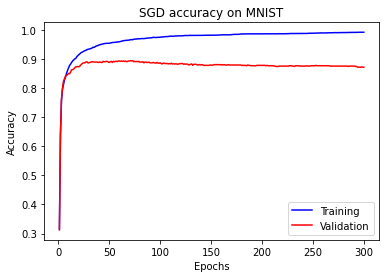

0.9554166666666667 0.0030641293851417306 0.8823333333333334 0.009285592184789422


In [39]:
num_hidden_units = network_optimizer.optimize_sgd_number_of_units(train_X, train_Y, 784, 7, 10)
optimum_epochs, train_performance, valid_performance = network_optimizer.optimize_sgd_epochs(train_X, train_Y, 784, num_hidden_units, 10)

print('Optimum hidden units:', num_hidden_units)
print('Optimum epochs:', optimum_epochs)
network_optimizer.graph_classifier_performance(train_performance, valid_performance, 'SGD accuracy on MNIST')

train_avg, train_std, test_avg, test_std = network_optimizer.evaluate_sgd(784, num_hidden_units, 10, train_X, train_Y, test_X, test_Y, optimum_epochs=100, num_runs=3)

print(train_avg, train_std, test_avg, test_std)


#### SCG

No. hidden units 8: Avg performance = 0.896
No. hidden units 9: Avg performance = 0.904
Optimum hidden units: 9
Optimum epochs: 0.2775


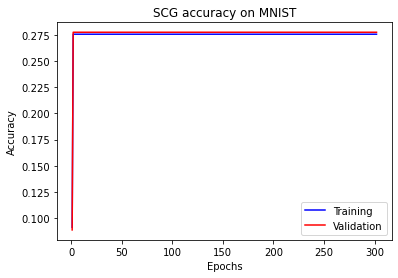

0.3525833333333333 0.0772836586147996 0.3506666666666667 0.08051638894590896


In [40]:
num_hidden_units = network_optimizer.optimize_scg_number_of_units(train_X, train_Y, 784, 7, 10)
optimum_epochs, train_performance, valid_performance = network_optimizer.optimize_scg_epochs(train_X, train_Y, 784, num_hidden_units, 10)

print('Optimum hidden units:', num_hidden_units)
print('Optimum epochs:', optimum_epochs)
network_optimizer.graph_classifier_performance(train_performance, valid_performance, 'SCG accuracy on MNIST')

train_avg, train_std, test_avg, test_std = network_optimizer.evaluate_scg(784, num_hidden_units, 10, train_X, train_Y, test_X, test_Y, optimum_epochs=100, num_runs=3)

print(train_avg, train_std, test_avg, test_std)

#### Leapfrog

No. hidden units 8: Avg performance = 0.889
No. hidden units 9: Avg performance = 0.890
Optimum hidden units: 9
Optimum epochs: 0.7975


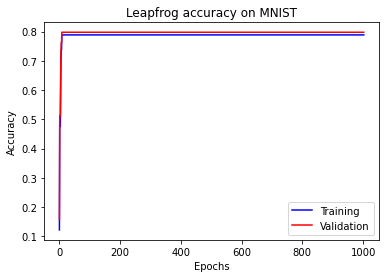

0.84 0.012160386507015316 0.8393333333333333 0.0020548046676563273


In [3]:
num_hidden_units = network_optimizer.optimize_leapfrog_number_of_units(train_X, train_Y, 784, 7, 10)
optimum_epochs, train_performance, valid_performance = network_optimizer.optimize_leapfrog_epochs(train_X, train_Y, 784, num_hidden_units, 10)

print('Optimum hidden units:', num_hidden_units)
print('Optimum epochs:', optimum_epochs)
network_optimizer.graph_classifier_performance(train_performance, valid_performance, 'Leapfrog accuracy on MNIST')
train_avg, train_std, test_avg, test_std = network_optimizer.evaluate_leapfrog(784, num_hidden_units, 10, train_X, train_Y, test_X, test_Y, optimum_epochs=100, num_runs=3)

print(train_avg, train_std, test_avg, test_std)

## Milk

In [4]:
df = pd.read_csv('./data/milknew.csv')

X = df.iloc[:, :-1].values  # All columns except the last one
Y = df.iloc[:, -1].values  # The last column

label_encoder = LabelEncoder()
scalers = [StandardScaler() for _ in range(X.shape[1])]
X = np.hstack([scaler.fit_transform(X[:, i].reshape(-1, 1)) for i, scaler in enumerate(scalers)])
Y = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)


#### SGD

Optimum hidden units: 2
Optimum epochs: 0.8823529411764706


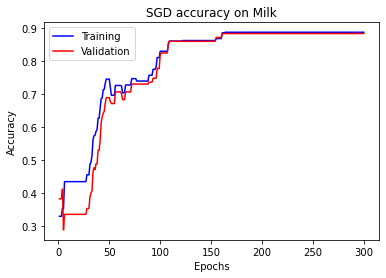

0.7327823691460056 0.038442802554901914 0.7232704402515724 0.02705133731774415


In [28]:
num_hidden_units = network_optimizer.optimize_sgd_number_of_units(train_X, train_Y, 7, 2, 3)
optimum_epochs, train_performance, valid_performance = network_optimizer.optimize_sgd_epochs(train_X, train_Y, 7, num_hidden_units, 3)

print('Optimum hidden units:', num_hidden_units)
print('Optimum epochs:', optimum_epochs)
network_optimizer.graph_classifier_performance(train_performance, valid_performance, 'SGD accuracy on Milk')

train_avg, train_std, test_avg, test_std = network_optimizer.evaluate_sgd(7, num_hidden_units, 3, train_X, train_Y, test_X, test_Y, optimum_epochs=100, num_runs=3)

print(train_avg, train_std, test_avg, test_std)


#### SCG

No. hidden units 3: Avg performance = 0.900
Optimum hidden units: 3
Optimum epochs: 0.9352941176470588


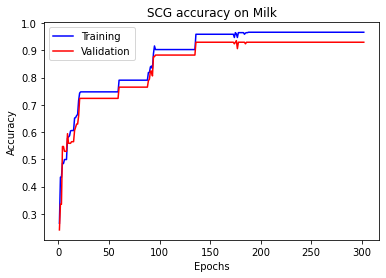

0.6816214088941361 0.22332955377299113 0.660377358490566 0.2265133434630749


In [32]:
num_hidden_units = network_optimizer.optimize_scg_number_of_units(train_X, train_Y, 7, 2, 3)
optimum_epochs, train_performance, valid_performance = network_optimizer.optimize_scg_epochs(train_X, train_Y, 7, num_hidden_units, 3)

print('Optimum hidden units:', num_hidden_units)
print('Optimum epochs:', optimum_epochs)
network_optimizer.graph_classifier_performance(train_performance, valid_performance, 'SCG accuracy on Milk')

train_avg, train_std, test_avg, test_std = network_optimizer.evaluate_scg(7, num_hidden_units, 3, train_X, train_Y, test_X, test_Y, optimum_epochs=100, num_runs=3)

print(train_avg, train_std, test_avg, test_std)

#### Leapfrog

No. hidden units 3: Avg performance = 0.859
No. hidden units 4: Avg performance = 0.924
No. hidden units 5: Avg performance = 0.929
Optimum hidden units: 5
Optimum epochs: 0.5235294117647059


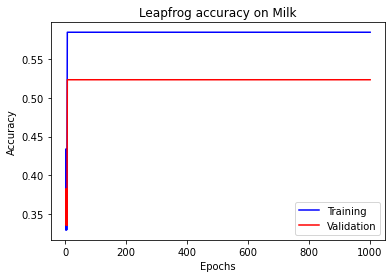

0.48563557654466744 0.05155600816146872 0.46069182389937113 0.08136697504990949


In [5]:
num_hidden_units = network_optimizer.optimize_leapfrog_number_of_units(train_X, train_Y, 7, 2, 3)
optimum_epochs, train_performance, valid_performance = network_optimizer.optimize_leapfrog_epochs(train_X, train_Y, 7, num_hidden_units, 3)

print('Optimum hidden units:', num_hidden_units)
print('Optimum epochs:', optimum_epochs)
network_optimizer.graph_classifier_performance(train_performance, valid_performance, 'Leapfrog accuracy on Milk')

train_avg, train_std, test_avg, test_std = network_optimizer.evaluate_leapfrog(7, num_hidden_units, 3, train_X, train_Y, test_X, test_Y, optimum_epochs=100, num_runs=3)

print(train_avg, train_std, test_avg, test_std)


## Mobile price

In [6]:
df = pd.read_csv('./data/mobile_price.csv')

X = df.iloc[:, :-1].values  # All columns except the last one
Y = df.iloc[:, -1].values  # The last column

label_encoder = LabelEncoder()
scalers = [StandardScaler() for _ in range(X.shape[1])]
X = np.hstack([scaler.fit_transform(X[:, i].reshape(-1, 1)) for i, scaler in enumerate(scalers)])
Y = label_encoder.fit_transform(Y)

# Split the data into training and testing sets
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)


#### SGD

Optimum hidden units: 3
Optimum epochs: 0.9625


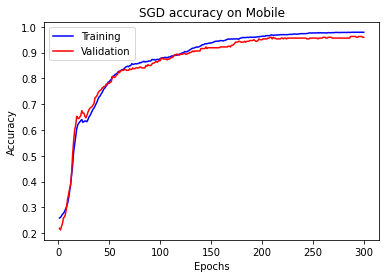

0.8964583333333334 0.016648427520005844 0.9008333333333334 0.013591255358583432


In [35]:
num_hidden_units = network_optimizer.optimize_sgd_number_of_units(train_X, train_Y, 20, 3, 4)
optimum_epochs, train_performance, valid_performance = network_optimizer.optimize_sgd_epochs(train_X, train_Y, 20, num_hidden_units, 4)

print('Optimum hidden units:', num_hidden_units)
print('Optimum epochs:', optimum_epochs)
network_optimizer.graph_classifier_performance(train_performance, valid_performance, 'SGD accuracy on Mobile')

train_avg, train_std, test_avg, test_std = network_optimizer.evaluate_sgd(20, num_hidden_units, 4, train_X, train_Y, test_X, test_Y, optimum_epochs=100, num_runs=3)

print(train_avg, train_std, test_avg, test_std)


Optimum hidden units: 3
Optimum epochs: 0.246875


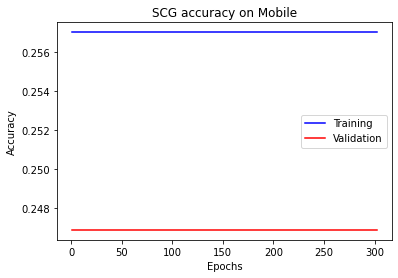

0.75 0.3389694092638253 0.7316666666666666 0.34766682646209174


In [36]:
num_hidden_units = network_optimizer.optimize_scg_number_of_units(train_X, train_Y, 20, 3, 4)
optimum_epochs, train_performance, valid_performance = network_optimizer.optimize_scg_epochs(train_X, train_Y, 20, num_hidden_units, 4)

print('Optimum hidden units:', num_hidden_units)
print('Optimum epochs:', optimum_epochs)
network_optimizer.graph_classifier_performance(train_performance, valid_performance, 'SCG accuracy on Mobile')

train_avg, train_std, test_avg, test_std = network_optimizer.evaluate_scg(20, num_hidden_units, 4, train_X, train_Y, test_X, test_Y, optimum_epochs=100, num_runs=3)

print(train_avg, train_std, test_avg, test_std)

No. hidden units 4: Avg performance = 0.966
Optimum hidden units: 4
Optimum epochs: 0.25


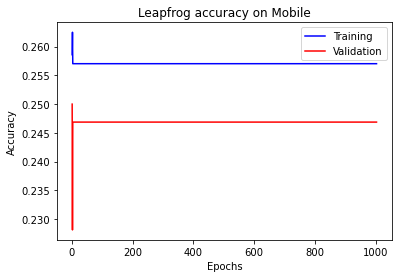

0.39166666666666666 0.15814874108115928 0.4058333333333333 0.14979615779080882


In [7]:
num_hidden_units = network_optimizer.optimize_leapfrog_number_of_units(train_X, train_Y, 20, 3, 4)
optimum_epochs, train_performance, valid_performance = network_optimizer.optimize_leapfrog_epochs(train_X, train_Y, 20, num_hidden_units, 4)

print('Optimum hidden units:', num_hidden_units)
print('Optimum epochs:', optimum_epochs)
network_optimizer.graph_classifier_performance(train_performance, valid_performance, 'Leapfrog accuracy on Mobile')

train_avg, train_std, test_avg, test_std = network_optimizer.evaluate_leapfrog(20, num_hidden_units, 4, train_X, train_Y, test_X, test_Y, optimum_epochs=100, num_runs=3)

print(train_avg, train_std, test_avg, test_std)
